In [1]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import statsmodels.tsa.api as tsa

from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

plt.style.use('fivethirtyeight')

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
oil = pd.read_csv('../../data/oils_clean.csv', header=0)
oil.head()

,date,dcoilwtico
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667


In [3]:
oil['date'] = pd.to_datetime(oil['date'], format = '%Y-%m-%d')
oil = oil.set_index('date')

In [4]:
# Convert to series object
data = oil['dcoilwtico']

Text(0.5,1,'Oil Barrel Prices')

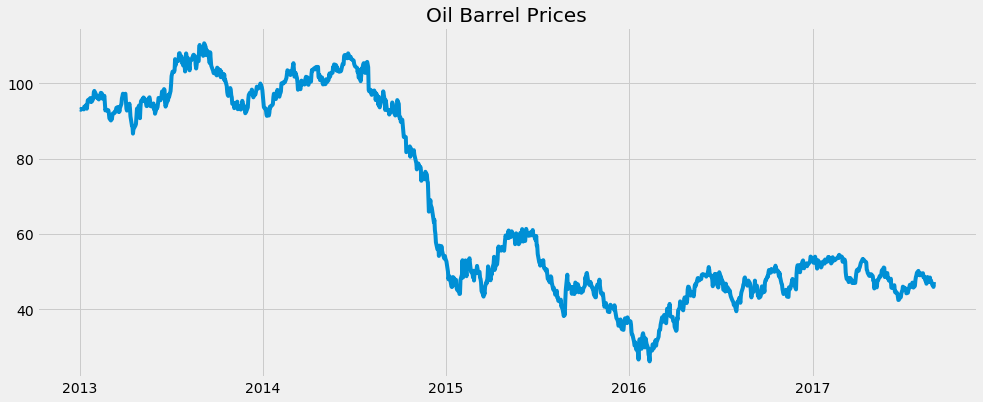

In [6]:
plt.plot(data.index.to_pydatetime(), data.values)
plt.title('Oil Barrel Prices')

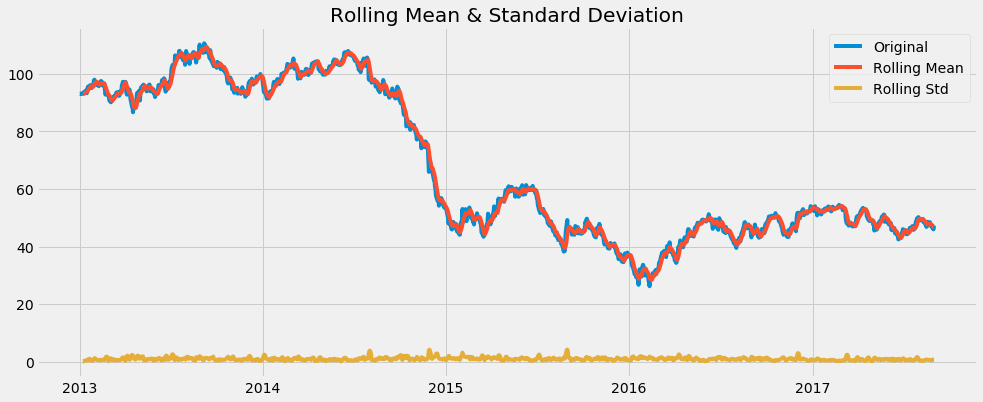

In [31]:
# Use Series rolling method, window is 7 for weekly average
rolmean = data.rolling(window=7).mean()
rolstd = data.rolling(window=7).std()

#Plot rolling statistics:
plt.close('all')
orig = plt.plot(data.index.to_pydatetime(), data.values, label='Original')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, label='Rolling Mean')
std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [10]:
#Perform Dickey-Fuller test:
test = adfuller(data, autolag='AIC')
test

(-0.87309179585786778,
 0.79670449248609621,
 0,
 1703,
 {'1%': -3.4341956747575719,
  '10%': -2.5676743155855317,
  '5%': -2.8632386494461093},
 4579.8350915268784)

In [23]:
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
#print('Critical Values: \t' + str(test[4]))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-0.873091795858
P Value: 		0.796704492486
Lags Used: 		0
Observations: 		1703
Critical Value 1%: 	-3.43419567476
Critical Value 5%: 	-2.86323864945
Critical Value 10%: 	-2.56767431559
Information Criterion: 	4579.83509153


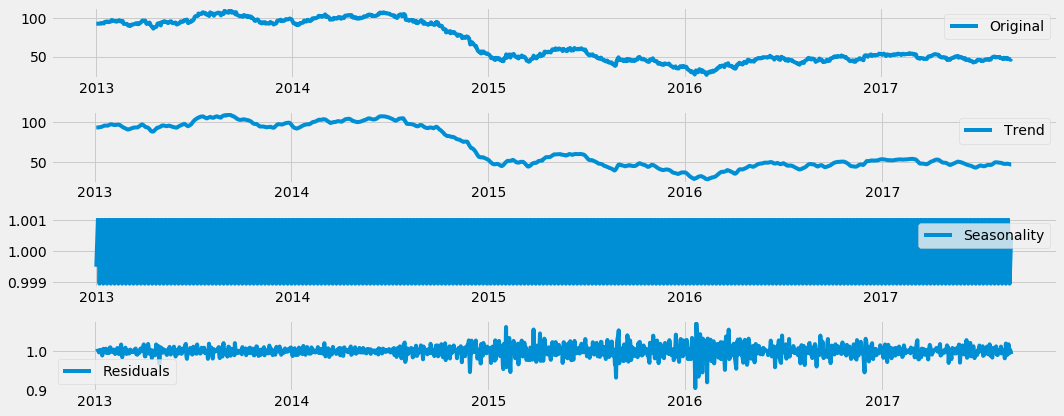

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data,model='multiplicative')

plt.subplot(411)
plt.plot(data.index.to_pydatetime(), data.values, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend.index.to_pydatetime(), decomposition.trend.values, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal.index.to_pydatetime(),decomposition.seasonal.values,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid.index.to_pydatetime(),decomposition.resid.values, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [25]:
logs = np.log(data)

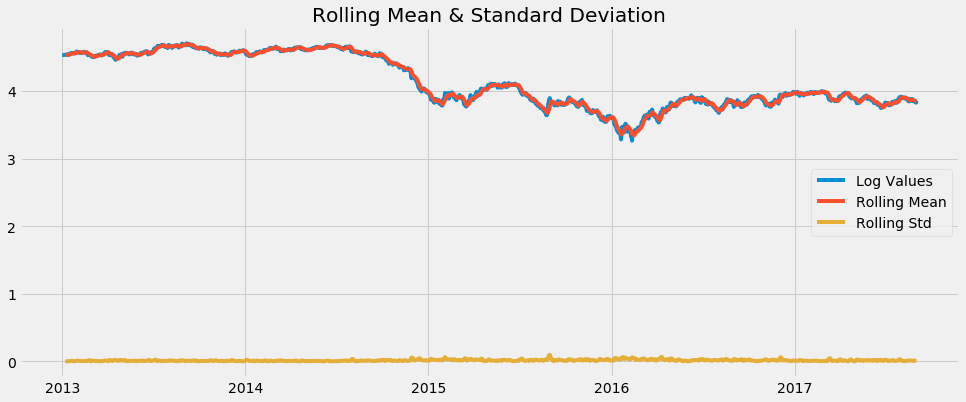

In [34]:
# Use Series rolling method, window is 7 for weekly average
rolmean = logs.rolling(window=7).mean()
rolstd = logs.rolling(window=7).std()

#Plot rolling statistics:
plt.close('all')
orig = plt.plot(logs.index.to_pydatetime(), logs.values, label='Log Values')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, label='Rolling Mean')
std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [29]:
test2 = adfuller(logs, autolag='AIC')
print('ADF Statistic: \t\t' + str(test2[0]))
print('P Value: \t\t' + str(test2[1]))
print('Lags Used: \t\t' + str(test2[2]))
print('Observations: \t\t' + str(test2[3]))
for key,value in test2[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
#print('Critical Values: \t' + str(test[4]))
print('Information Criterion: \t' + str(test2[5]))

ADF Statistic: 		-1.0692035029
P Value: 		0.727195680376
Lags Used: 		0
Observations: 		1703
Critical Value 1%: 	-3.43419567476
Critical Value 5%: 	-2.86323864945
Critical Value 10%: 	-2.56767431559
Information Criterion: 	-8801.32975534


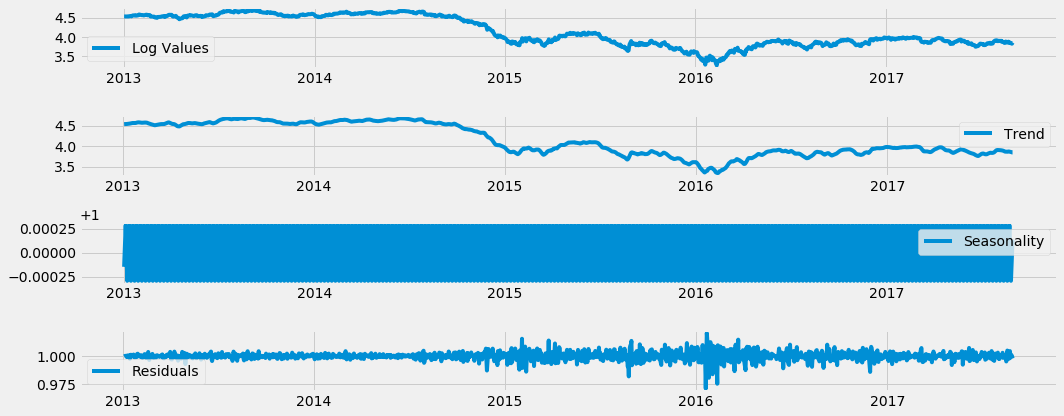

In [36]:
decomposition2 = seasonal_decompose(logs,model='multiplicative')

plt.subplot(411)
plt.plot(logs.index.to_pydatetime(), logs.values, label='Log Values')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition2.trend.index.to_pydatetime(), decomposition2.trend.values, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition2.seasonal.index.to_pydatetime(),decomposition2.seasonal.values,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition2.resid.index.to_pydatetime(),decomposition2.resid.values, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

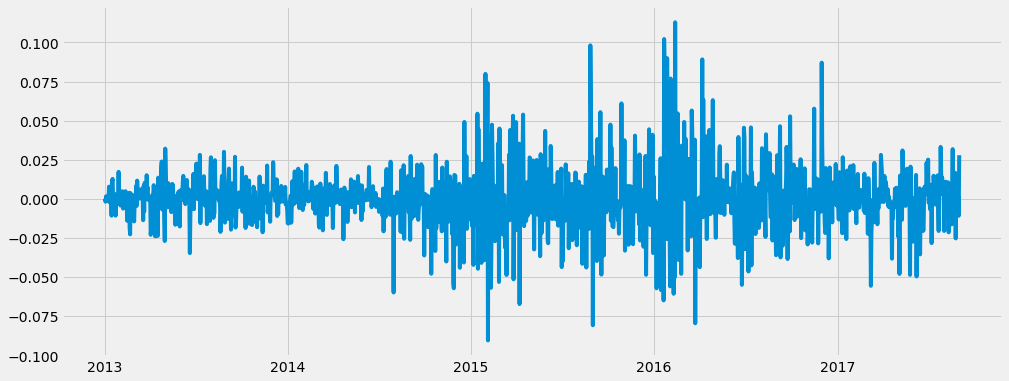

In [38]:
log_diff = logs - logs.shift()
plt.plot(log_diff.index.to_pydatetime(), log_diff.values)

In [40]:
log_diff.dropna(inplace=True)
test3 = adfuller(log_diff, autolag='AIC')
print('ADF Statistic: \t\t' + str(test3[0]))
print('P Value: \t\t' + str(test3[1]))
print('Lags Used: \t\t' + str(test3[2]))
print('Observations: \t\t' + str(test3[3]))
for key,value in test3[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
#print('Critical Values: \t' + str(test[4]))
print('Information Criterion: \t' + str(test3[5]))

ADF Statistic: 		-41.9245602587
P Value: 		0.0
Lags Used: 		0
Observations: 		1702
Critical Value 1%: 	-3.43419793768
Critical Value 5%: 	-2.86323964835
Critical Value 10%: 	-2.56767484748
Information Criterion: 	-8794.36614999


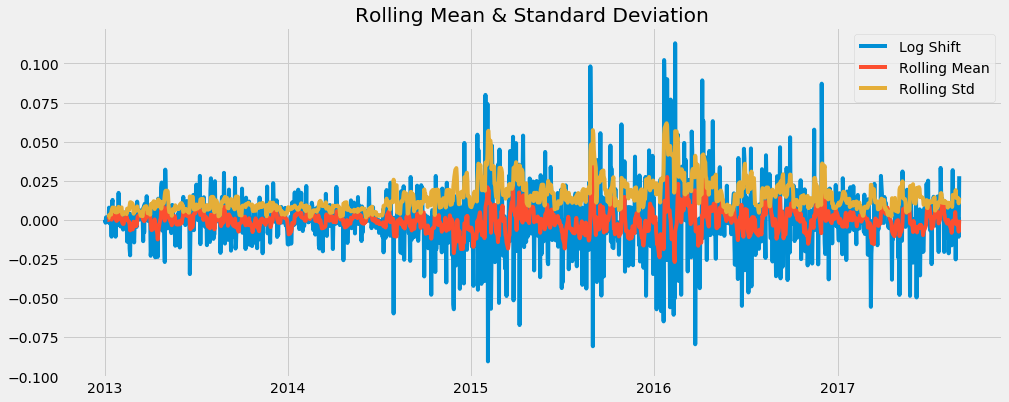

In [41]:
# Use Series rolling method, window is 7 for weekly average
rolmean = log_diff.rolling(window=7).mean()
rolstd = log_diff.rolling(window=7).std()

#Plot rolling statistics:
plt.close('all')
orig = plt.plot(log_diff.index.to_pydatetime(), log_diff.values, label='Log Shift')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, label='Rolling Mean')
std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

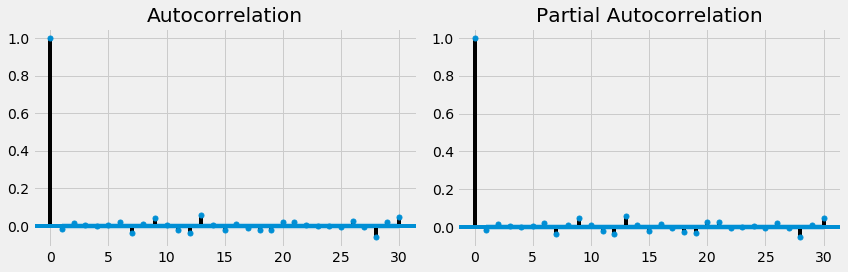

In [43]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

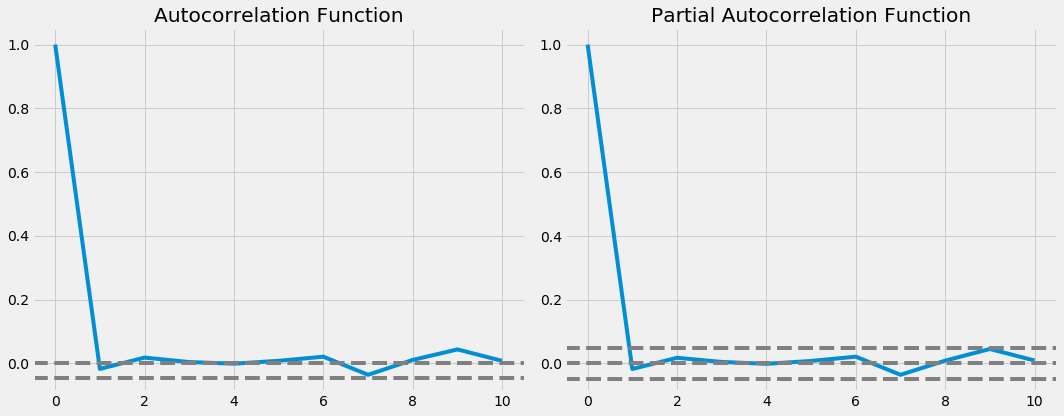

In [45]:
#ACF and PACF plots
lag_acf = acf(log_diff, nlags=10)
lag_pacf = pacf(log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [60]:
model = ARIMA(log_diff, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5,1,'RSS: nan')

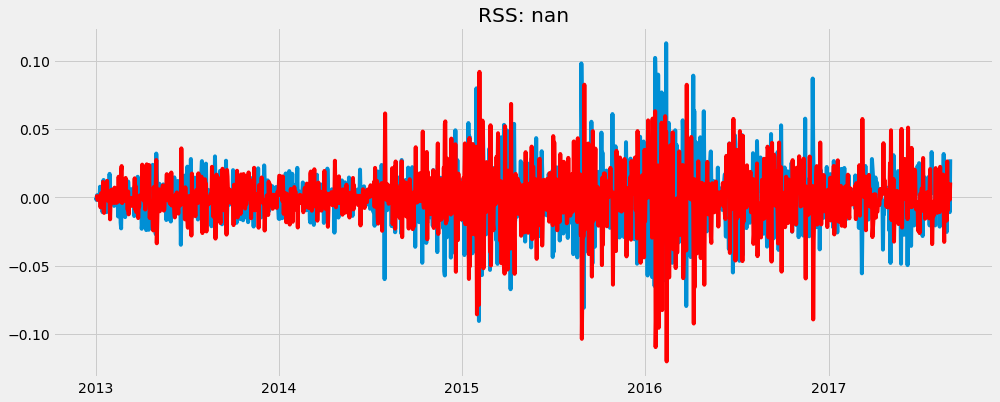

In [64]:
plt.plot(log_diff.index.to_pydatetime(), log_diff.values)
plt.plot(log_diff[1:].index.to_pydatetime(), results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_diff)**2))

In [65]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.dcoilwtico   No. Observations:                 1702
Model:                 ARIMA(2, 1, 1)   Log Likelihood                4471.615
Method:                       css-mle   S.D. of innovations              0.017
Date:                Thu, 14 Dec 2017   AIC                          -8933.231
Time:                        12:29:50   BIC                          -8906.033
Sample:                    01-03-2013   HQIC                         -8923.162
                         - 08-31-2017                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.23e-07   3.13e-06      0.039      0.969   -6.01e-06    6.25e-06
ar.L1.D.dcoilwtico    -0.0326      0.025     -1.307      0.192      -0.081       0.016
ar.L2.D.dcoilwtico  

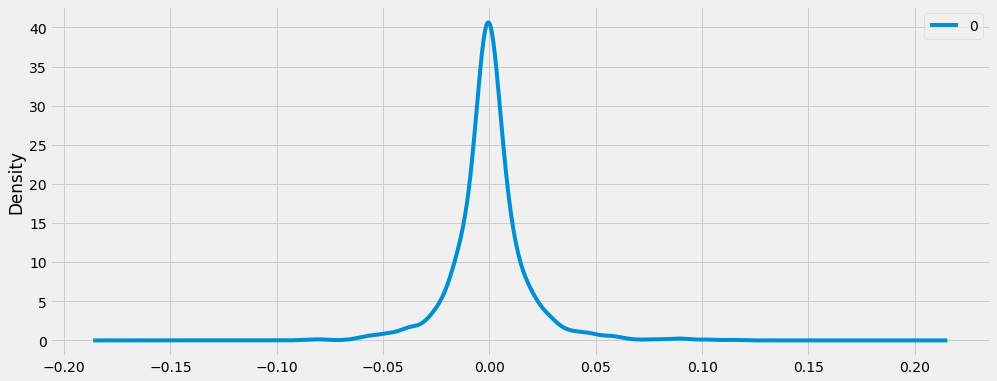

In [66]:
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')

In [67]:
residuals.describe()

,0
count,1702.000000
mean,-0.000055
std,0.017473
min,-0.085925
25%,-0.006510
50%,-0.000499
75%,0.005712
max,0.114905


In [93]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2013-01-03    1.229698e-07
2013-01-04    9.612975e-04
2013-01-05   -1.803136e-03
2013-01-06   -2.475210e-04
2013-01-07   -2.239873e-04
dtype: float64


In [94]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(logs.iloc[0], index=logs.index)

In [95]:
predictions_ARIMA_log.head()

date
2013-01-01    4.534104
2013-01-02    4.534104
2013-01-03    4.534104
2013-01-04    4.534104
2013-01-05    4.534104
dtype: float64

In [97]:
predictions_ARIMA_log = predictions_ARIMA_log.subtract(predictions_ARIMA_diff_cumsum,fill_value=0)

In [98]:
predictions_ARIMA_log.head()

date
2013-01-01    4.534104
2013-01-02    4.534104
2013-01-03    4.534104
2013-01-04    4.533142
2013-01-05    4.534945
dtype: float64

In [99]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

In [100]:
predictions_ARIMA.head()

date
2013-01-01    93.140000
2013-01-02    93.140000
2013-01-03    93.139989
2013-01-04    93.050496
2013-01-05    93.218430
dtype: float64

Text(0.5,1,'RMSE: 27.9673')

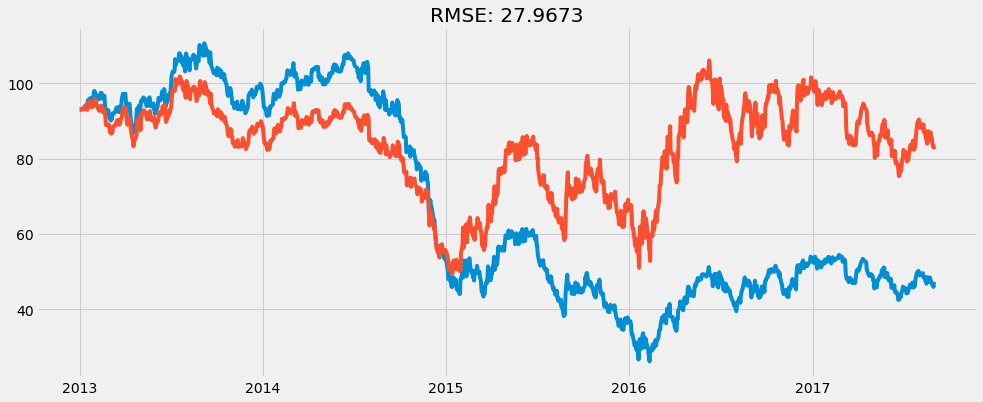

In [101]:
plt.plot(data.index.to_pydatetime(), data.values)
plt.plot(data.index.to_pydatetime(), predictions_ARIMA.values)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

# Extracting Trend First

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np
from sklearn.linear_model import LinearRegression

In [120]:
temp = pd.DataFrame({'date': (data.index - data.index[0]).days, 'price': data.values})
temp = temp[temp['date']!=0]

In [139]:
array=temp.values

Y=array[:,1]
X=array[:,0]
X= X.reshape(-1, 1)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5)

In [140]:
lm=LinearRegression()

lm.fit(X_train, Y_train)

ptrain = lm.predict(X_train)
ptest = lm.predict(X_test)

mae_train = mean_absolute_error(Y_train, ptrain)
mae_test = mean_absolute_error(Y_test, ptest)
mape_train = np.mean(np.abs((Y_train - ptrain) / Y_train)) * 100
mape_test = np.mean(np.abs((Y_test - ptest) / Y_test)) * 100

print('|metric |train            |test             | \n|mae    |' +str(mae_train)
      +'    |'+str(mae_test)+'    |\n|mape   |'+str(mape_train)+'    |'+str(mape_test)
      +'    |')

|metric |train            |test             | 
|mae    |12.0149628553    |12.3751737401    |
|mape   |21.0592038174    |22.8692977375    |


In [141]:
lm.intercept_

104.83977563086071

In [142]:
lm.coef_

array([-0.04317551])

In [143]:
predictions = lm.predict(X)

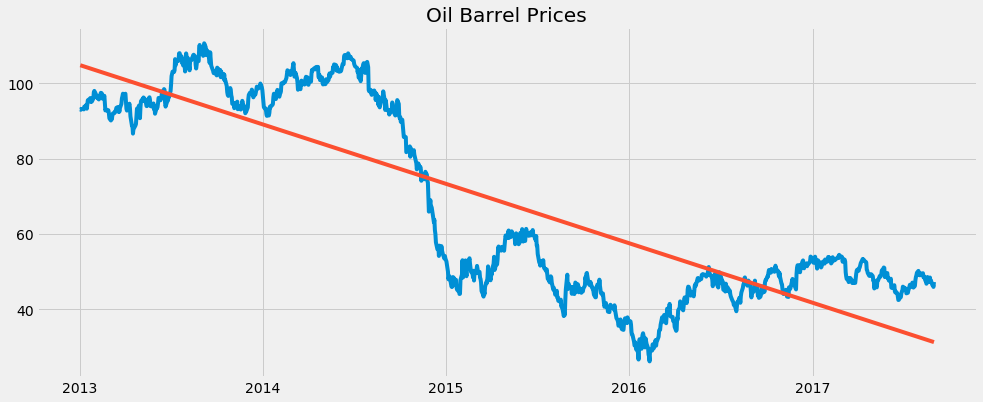

In [144]:
plt.plot(data.index.to_pydatetime(), data.values)
plt.plot(data[1:].index.to_pydatetime(), predictions)
plt.title('Oil Barrel Prices')
plt.show()

In [147]:
trend_extraction = data[1:].subtract(predictions, fill_value=0)

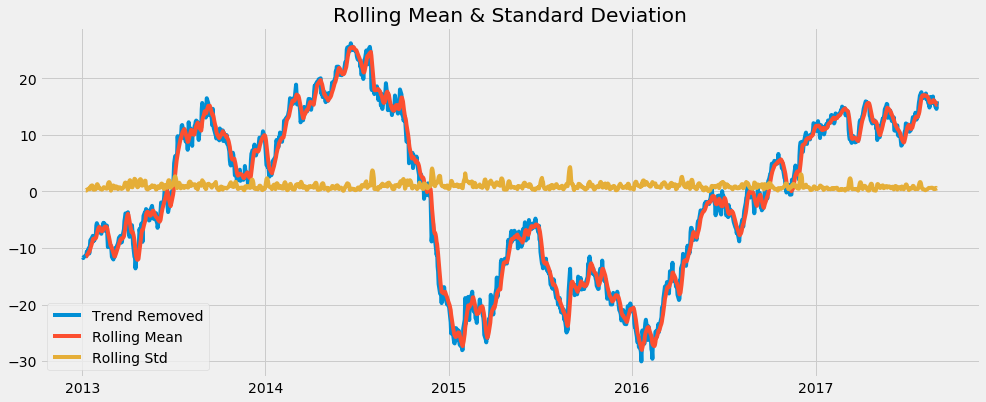

In [149]:
# Use Series rolling method, window is 7 for weekly average
rolmean = trend_extraction.rolling(window=7).mean()
rolstd = trend_extraction.rolling(window=7).std()

#Plot rolling statistics:
plt.close('all')
orig = plt.plot(trend_extraction.index.to_pydatetime(), trend_extraction.values, label='Trend Removed')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, label='Rolling Mean')
std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

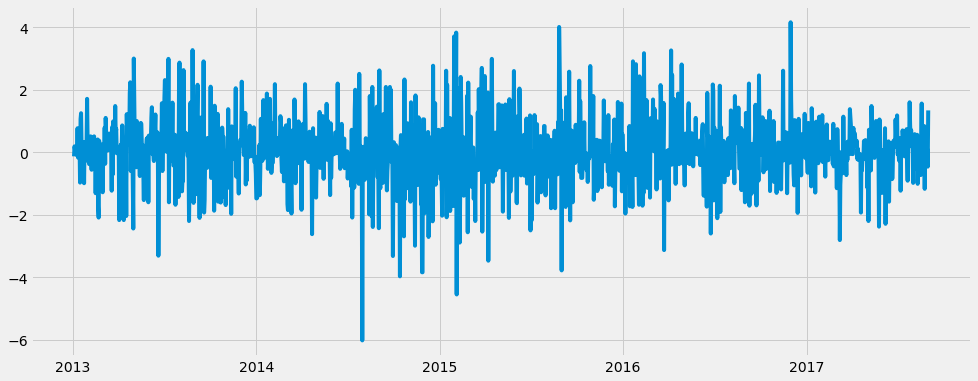

In [156]:
diff = trend_extraction - trend_extraction.shift()
plt.plot(diff.index.to_pydatetime(), diff.values)

In [157]:
diff.dropna(inplace=True)
test3 = adfuller(diff, autolag='AIC')
print('ADF Statistic: \t\t' + str(test3[0]))
print('P Value: \t\t' + str(test3[1]))
print('Lags Used: \t\t' + str(test3[2]))
print('Observations: \t\t' + str(test3[3]))
for key,value in test3[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
#print('Critical Values: \t' + str(test[4]))
print('Information Criterion: \t' + str(test3[5]))

ADF Statistic: 		-41.4194793135
P Value: 		0.0
Lags Used: 		0
Observations: 		1701
Critical Value 1%: 	-3.43420020327
Critical Value 5%: 	-2.86324064842
Critical Value 10%: 	-2.56767538
Information Criterion: 	4577.04716653


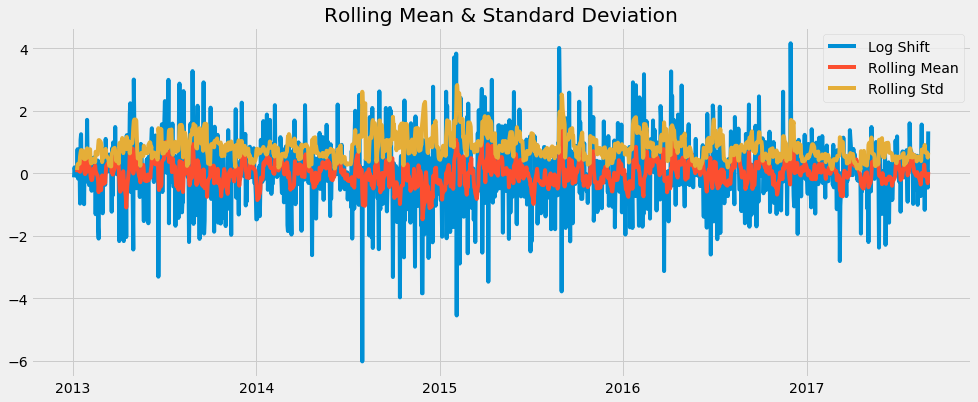

In [158]:
# Use Series rolling method, window is 7 for weekly average
rolmean = diff.rolling(window=7).mean()
rolstd = diff.rolling(window=7).std()

#Plot rolling statistics:
plt.close('all')
orig = plt.plot(diff.index.to_pydatetime(), diff.values, label='Log Shift')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, label='Rolling Mean')
std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

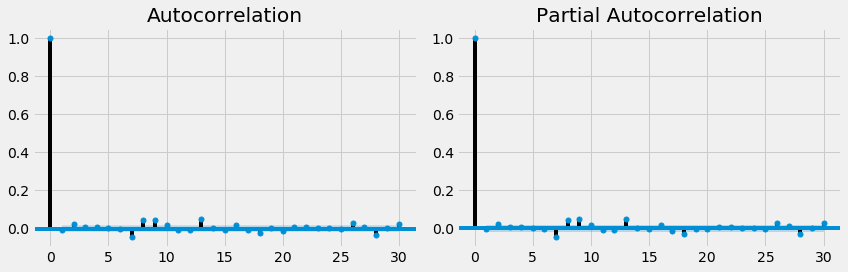

In [159]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

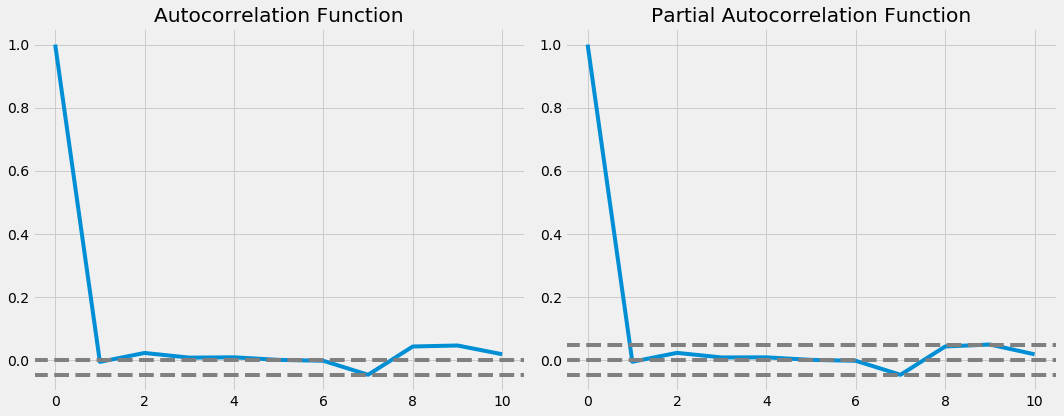

In [160]:
#ACF and PACF plots
lag_acf = acf(diff, nlags=10)
lag_pacf = pacf(diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [161]:
model3 = ARIMA(diff, order=(2, 1, 1))  
results_ARIMA = model3.fit(disp=-1)  

Text(0.5,1,'RSS: nan')

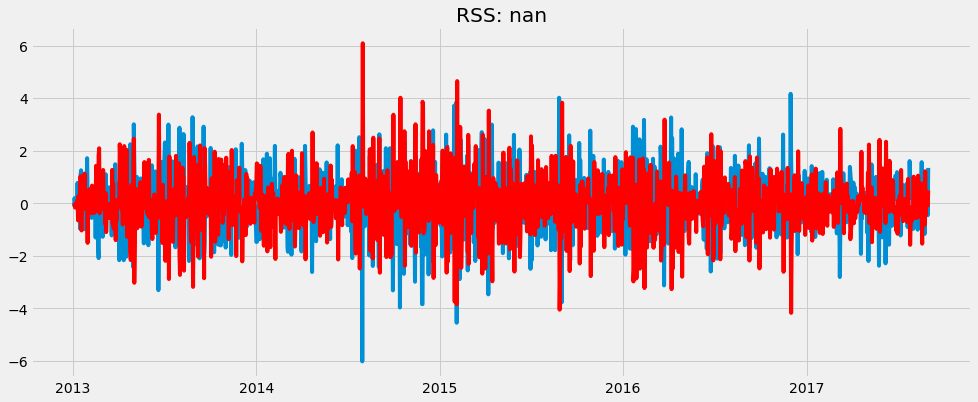

In [162]:
plt.plot(diff.index.to_pydatetime(), diff.values)
plt.plot(diff[1:].index.to_pydatetime(), results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-diff)**2))

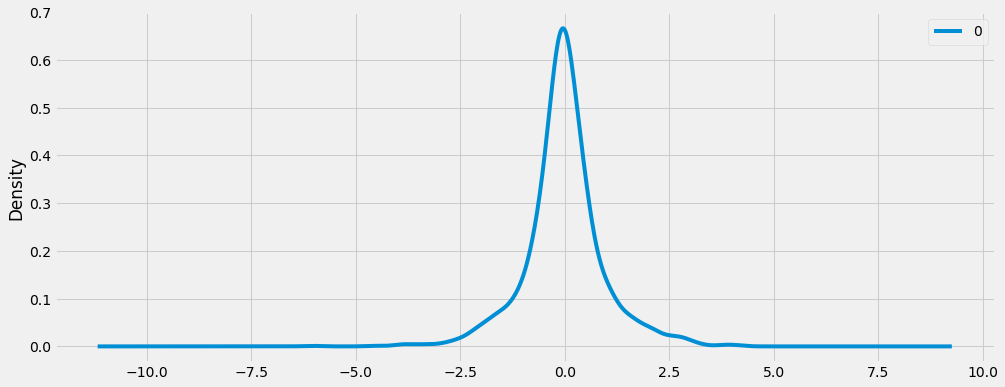

In [163]:
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')

In [164]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2013-01-04    0.000011
2013-01-05   -0.164475
2013-01-06   -0.019736
2013-01-07   -0.017781
2013-01-08   -0.014274
dtype: float64


In [173]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_t = pd.Series(trend_extraction.iloc[0], index=trend_extraction.index)

In [174]:
predictions_ARIMA_t = predictions_ARIMA_t.subtract(predictions_ARIMA_diff_cumsum,fill_value=0)

In [175]:
predictions_ARIMA = predictions_ARIMA_t.add(predictions, fill_value=0)

In [176]:
predictions_ARIMA.head()

date
2013-01-02    93.140000
2013-01-03    93.096824
2013-01-04    93.053638
2013-01-05    93.174938
2013-01-06    93.151498
dtype: float64

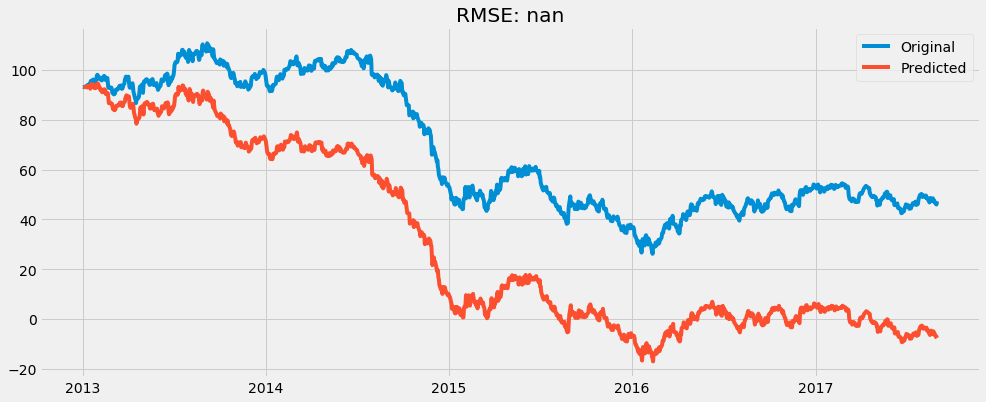

In [179]:
plt.plot(data.index.to_pydatetime(), data.values, label='Original')
plt.plot(data[1:].index.to_pydatetime(), predictions_ARIMA.values, label='Predicted')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))
plt.legend()
plt.show()

# Using Only Data After the Permanent Break

In [181]:
oil.head()

,dcoilwtico
date,
2013-01-01,93.140000
2013-01-02,93.140000
2013-01-03,92.970000
2013-01-04,93.120000
2013-01-05,93.146667


In [183]:
data2 = oil.loc[oil.index>'2015']

In [184]:
data2.head()

,dcoilwtico
date,
2015-01-02,52.72
2015-01-03,51.83
2015-01-04,50.94
2015-01-05,50.05
2015-01-06,47.98


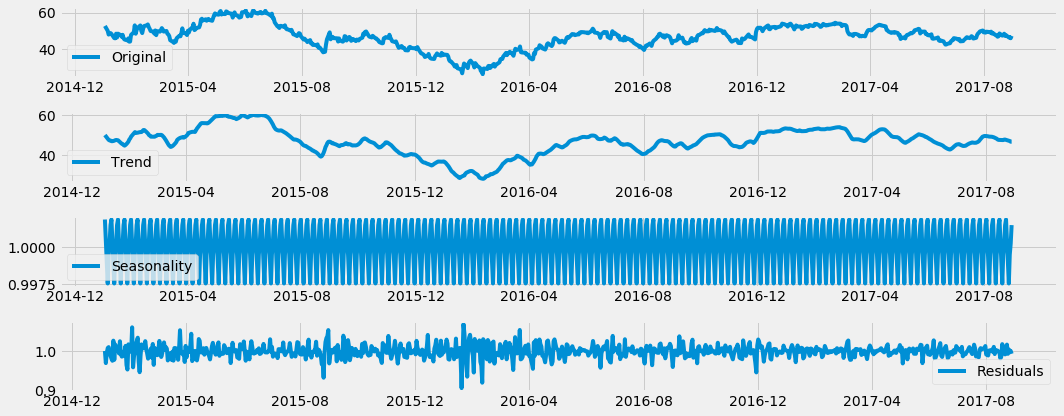

In [185]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data2,model='multiplicative')

plt.subplot(411)
plt.plot(data2.index.to_pydatetime(), data2.values, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend.index.to_pydatetime(), decomposition.trend.values, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal.index.to_pydatetime(),decomposition.seasonal.values,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid.index.to_pydatetime(),decomposition.resid.values, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

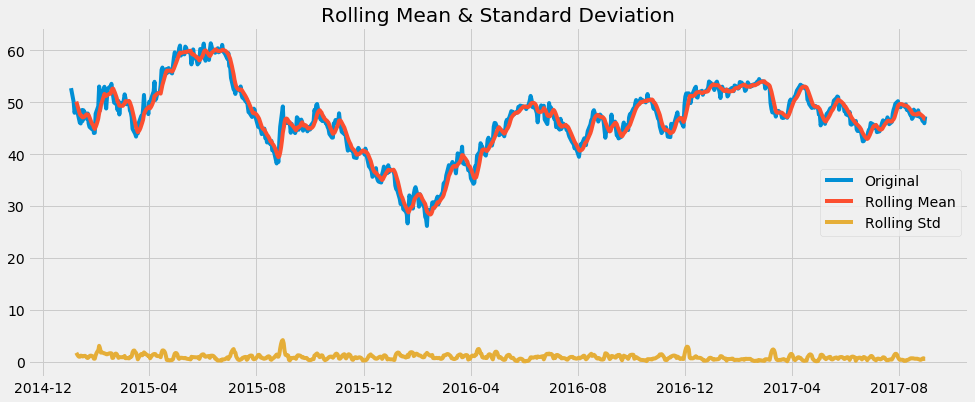

In [191]:
# Use Series rolling method, window is 7 for weekly average
rolmean = data2.rolling(window=7).mean()
rolstd = data2.rolling(window=7).std()

#Plot rolling statistics:
plt.close('all')
orig = plt.plot(data2.index.to_pydatetime(), data2.values, label='Original')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, label='Rolling Mean')
std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [190]:
test3 = adfuller(data2.iloc[:,0].values, autolag='AIC')
print('ADF Statistic: \t\t' + str(test3[0]))
print('P Value: \t\t' + str(test3[1]))
print('Lags Used: \t\t' + str(test3[2]))
print('Observations: \t\t' + str(test3[3]))
for key,value in test3[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
#print('Critical Values: \t' + str(test[4]))
print('Information Criterion: \t' + str(test3[5]))

ADF Statistic: 		-2.26839217426
P Value: 		0.182364806486
Lags Used: 		0
Observations: 		972
Critical Value 1%: 	-3.43709552842
Critical Value 5%: 	-2.86451808472
Critical Value 10%: 	-2.56835568922
Information Criterion: 	2541.58879366


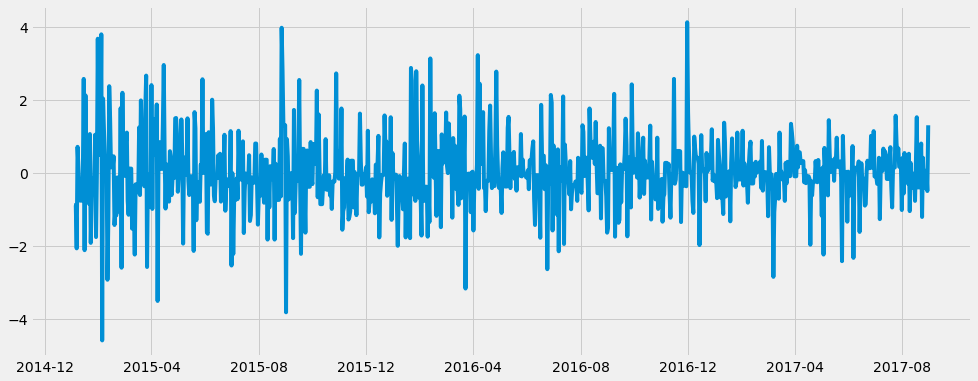

In [192]:
diff = data2 - data2.shift()
plt.plot(diff.index.to_pydatetime(), diff.values)

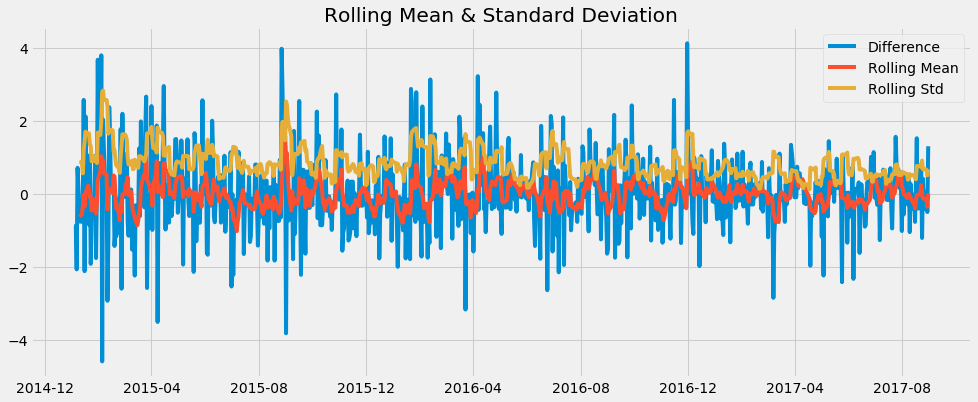

In [193]:
# Use Series rolling method, window is 7 for weekly average
rolmean = diff.rolling(window=7).mean()
rolstd = diff.rolling(window=7).std()

#Plot rolling statistics:
plt.close('all')
orig = plt.plot(diff.index.to_pydatetime(), diff.values, label='Difference')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, label='Rolling Mean')
std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [196]:
diff.dropna(inplace=True)
test3 = adfuller(diff.iloc[:,0].values, autolag='AIC')
print('ADF Statistic: \t\t' + str(test3[0]))
print('P Value: \t\t' + str(test3[1]))
print('Lags Used: \t\t' + str(test3[2]))
print('Observations: \t\t' + str(test3[3]))
for key,value in test3[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
#print('Critical Values: \t' + str(test[4]))
print('Information Criterion: \t' + str(test3[5]))

ADF Statistic: 		-32.0638379297
P Value: 		0.0
Lags Used: 		0
Observations: 		971
Critical Value 1%: 	-3.4371024939
Critical Value 5%: 	-2.86452115646
Critical Value 10%: 	-2.56835732533
Information Criterion: 	2543.97001552


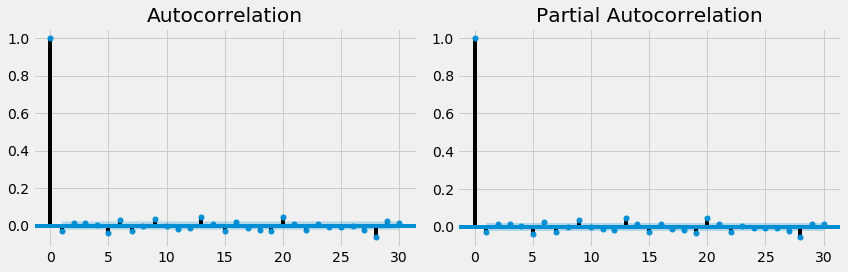

In [200]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

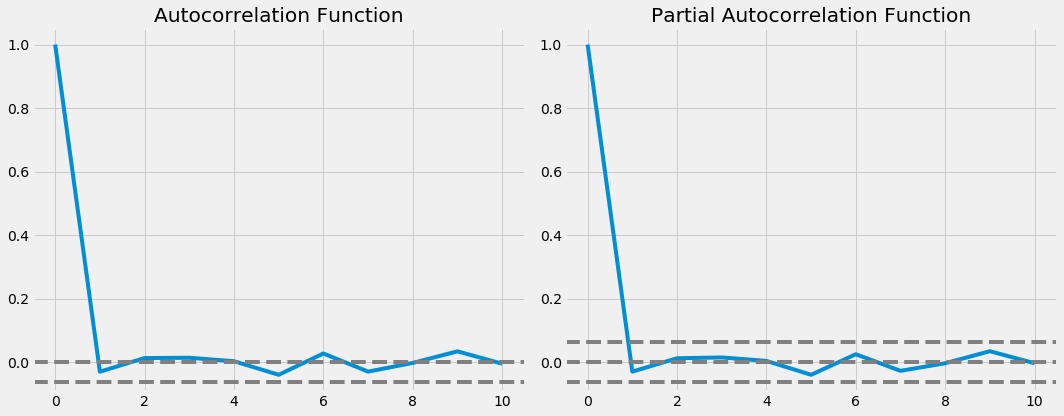

In [201]:
#ACF and PACF plots
lag_acf = acf(diff, nlags=10)
lag_pacf = pacf(diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [198]:
model = ARIMA(diff, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  

Text(0.5,1,'RSS: nan')

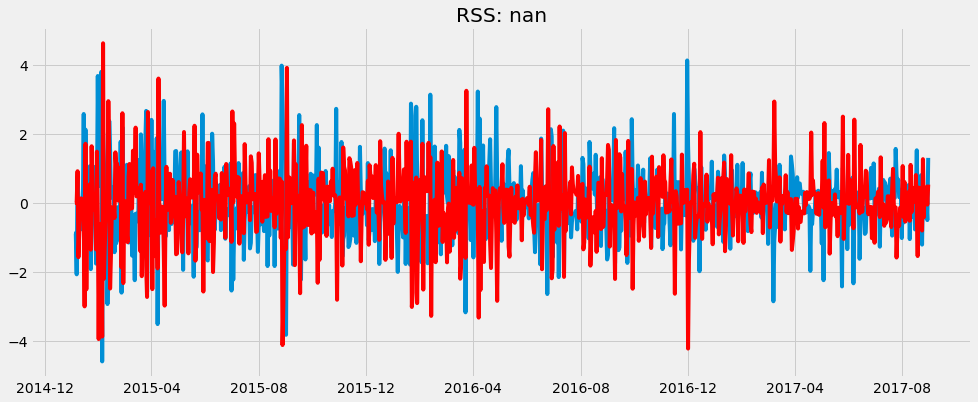

In [199]:
plt.plot(diff.index.to_pydatetime(), diff.values)
plt.plot(diff[1:].index.to_pydatetime(), results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_diff)**2))

In [202]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.dcoilwtico   No. Observations:                  971
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1309.665
Method:                       css-mle   S.D. of innovations              0.929
Date:                Thu, 14 Dec 2017   AIC                           2629.330
Time:                        14:58:02   BIC                           2653.721
Sample:                    01-04-2015   HQIC                          2638.613
                         - 08-31-2017                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.089e-05      0.000      0.390      0.696      -0.000       0.000
ar.L1.D.dcoilwtico    -0.0254      0.032     -0.792      0.429      -0.088       0.038
ar.L2.D.dcoilwtico  

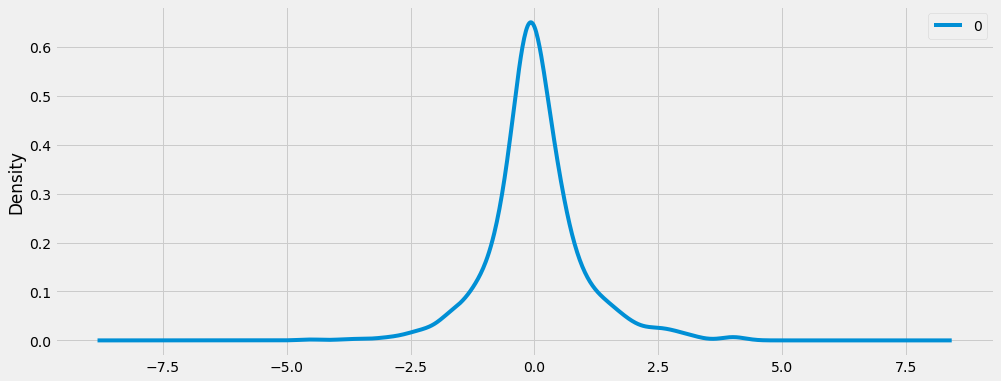

In [203]:
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')

In [204]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2015-01-04    0.000041
2015-01-05    0.000062
2015-01-06    0.000083
2015-01-07    0.914296
2015-01-08   -1.574077
dtype: float64


In [222]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA = pd.Series(data2.values[0], index=data2.index)
predictions_ARIMA.head()

date
2015-01-02    52.72
2015-01-03    52.72
2015-01-04    52.72
2015-01-05    52.72
2015-01-06    52.72
dtype: float64

In [223]:
predictions_ARIMA = predictions_ARIMA.subtract(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA.head()

date
2015-01-02    52.720000
2015-01-03    52.720000
2015-01-04    52.719959
2015-01-05    52.719897
2015-01-06    52.719814
dtype: float64

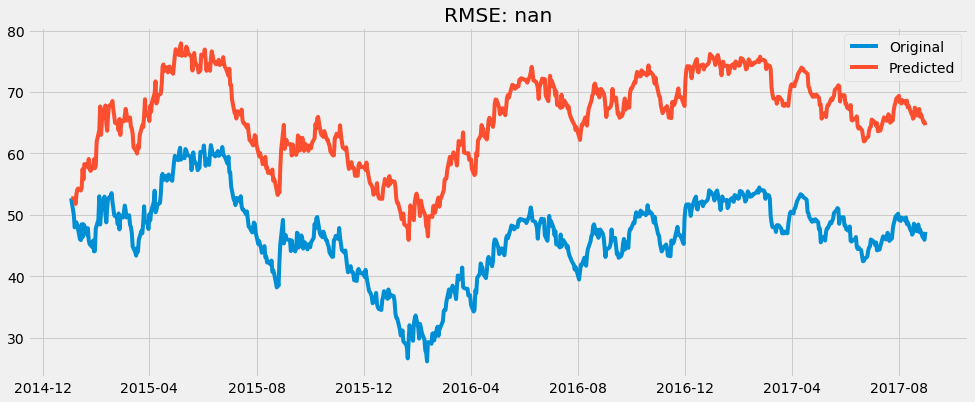

In [224]:
plt.plot(data2.index.to_pydatetime(), data2.values, label='Original')
plt.plot(data2.index.to_pydatetime(), predictions_ARIMA.values, label='Predicted')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data2)))
plt.legend()
plt.show()

In [228]:
data2.to_csv('oil_azure.csv')